# Interpolation

In this exercise we will look at one dimensional interpolation as a way to approximate new data points from a discrete set of known data.

## Warm up: Linear interpolation

The first method we will implement is linear interpolation. This is one of the simplest ways to interpolate between points that can give good results.

Let's assume as an example that we have a set of temperature measurements done different times. If we want to approximate the temperature between two of the measured times, one way to do that would be to draw a straight line between the two known measurements, we can think of these as coordinate pairs $(x_1,y_1)$ and $(x_2,y_2)$, and use that as an approximation.

## a)

Implement the following pseudocode in the function definition below:

slope = (y_end - y_start) / (x_end - x_start)

interpolate = y_start + (interpolation_point - x_start) * slope

Remember that in Python, the first element in a list of n elements has index 0 and the last element has index n-1. E.g. if we make a list of 3 elements and we want to print the first element, we would write

```
list_of_stuff = [1,2,3]
print(list_of_stuff[0])
1
>>>
```

The code below should print 18.4 when it interpolates correctly.


In [66]:


x_data = [0.0,2.0]
y_data = [22.3,14.5]
point = 1.0

def linear_interpolation(x,y,point):
    """This function should take two lists containing two numbers each, corresponding to two points,
    and a number as an input. It should return the linear interpolation at the point between the two points"""
    ##Write your code here
    slope = (y[1]-y[0])/(x[1]-x[0])
    interpolated_y_value = y[0]+(point-x[0])*slope
    
    
    return interpolated_y_value


inter_val = linear_interpolation(x_data,y_data, point)
print(inter_val)


18.4


Next, we want to expand the functionality of the code above. If we have very large datasets and/or we want to interpolate many points it can be tedious and time consuming to manually go through the list and finding the indeces of the points. It would be nice if we could give larger datasets together with a point as inputs, and make the function figure out where it should interpolate.

One thing we can do to achieve this is run through our list of "x-values" and check if the point we have given lies between the current value in the list, and the next one.

For example, let's take a list that is similar to the one we used above and imagine that it is a set of times. We now want to find out what points we want to use if we are to interpolate at the time 2.5. In pseudocode we want to do something like this:

```
list_of_stuff = [1,2,3,4]
point = 2.5

for i in range(length of list_of_stuff):
    if point > list_of_stuff[i] and point < list_of_stuff[i+1]:
        use the index i to interpolate
        break
```

In this small example we can go through what is going to happen step by step. The loop will start out with i = 0, so the list element with index i = 0 becomes 1, the element with index i + 1 = 1 becomes 2. First it checks if 2.5 larger than 1, then it checks if 2 is less than 2.5 and executes the code in the if-statement only if both of those are true. Clearly, 2 is larger than 2.5, so it does not execute. 

On the next loop, i increments to 1 and the list element with index i = 1 is now 2, and the element with index i + 1 = 2 is 3. It will first check if 2.5 is larger than 2, then it checks if 2.5 is less than 3. As both of these are correct, the code in the if-statement will execute and the loop will end because of the break statement.

We would also need to store the value of the index i in a variable if we want to use this later in the code.

The pseudocode above will not give us the required index if we give a point that is outside of the range of our dataset (we can't give a time that is earlier than the earliest time we have data for, or later than the latest time), it will also fail if we try to interpolate at a point where we have a measurement (for instance at the point 1 or 3). You can try to solve these issues with simple checks in your code.

## b)

Implement the pseudocode above in your code from a), remember to store the index you find in a variable for use in the interpolation. 

When you run the block below it should print 7.857, and blue cross (the interpolated point) should lie on a straight line between the two adjacent red dots in the plot.

7.857


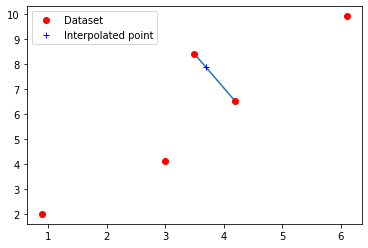

In [67]:
import matplotlib.pyplot as plt

dataset_x = [0.9,3.0,3.5,4.2,6.1]
dataset_y = [2.0,4.1,8.4,6.5,9.9]
point = 3.7

def automatic_interpolation(x,y,point,plot):
    """This function should take in two lists of corresponding data and 
    a point to interpolate"""
    ## Write your code here
    index=0
    for i in range(len(x)):
        if x[i] < point and x[i+1] > point:
            index = i
            break
    ### Creates lists with only the points we want to interpolate between for use in the function from a) 
    x_data = [x[index], x[index+1]]
    y_data = [y[index], y[index+1]]
    if plot == "y":
        plt.plot(x_data,y_data)
    
    inter_value = linear_interpolation(x_data,y_data,point)
    return inter_value


inter_val = automatic_interpolation(dataset_x,dataset_y, point, "y")
print(round(inter_val,3))

plt.plot(dataset_x, dataset_y,"ro", label = "Dataset")
plt.plot(point,inter_val,"b+", label = "Interpolated point")
plt.legend()

## Quadratic and cubic interpolation

### Quadratic interpolation

Linear interpolation is simple and quick, but it is not always a good fit for the data we are looking at, it is often more realistic that the measurements would change smoothly rather than the sudden change we assume in linear interpolation.

A quadratic function or a cubic function can give us just that.

If we want to find for instance a quadratic function that fits our points, we can start by assuming that we can fit a function on the form 

$$g(x) = k_0 + k_1 x + k_2 x^2$$

(where $k_0,k_1, k_2$ are constants) to our data.

This has 3 unknowns, so if we insert 3 points from our dataset and demand that the function should pass through the points $(x_0, f(x_0))$, $(x_1, f(x_1))$, $(x_2, f(x_2))$, we should be able to solve for the constants.

The above form of the function $f(x)$ is not the most practical for interpolation, if we instead write our quadratic function on the form

$$f(x) = c_0 + c_1 (x-x_0) + c_2 (x-x_0)(x-x_1)$$

it becomes easier to solve for our constants. It can also be expanded to higher order polynomials easier.

We will not go through the solution for the constants here, but simply present the equations.

$$c_0 = f(x_0)\\ c_1 = \frac{f(x_1)-c_0}{x_1-x_0} \\ c_2 = \frac{f(x_2)-c_0-c_1(x_2-x_0)}{(x_2-x_0)(x_2-x_1)} $$

Note that we need 3 points to interpolate here, to do linear interpolation we needed only 2 points.

Also note that we can reuse the logic from b) for finding the index here, we simply use the index i for $x_1, f(x_1)$ and then use i+1 and i+2 to interpolate. As you will see if you try to run this for different points, this won't always be optimal if the point chosen is very close to one of the data points. For better results we can implement an extra check that moves the index one step down, or up depending on which of the datapoints are closest to our chosen interpolation point.
```
if index != 0 and index !=  length of x_data:
    if distance_between point and x_data[index+2] < distance_between point and x_data[index+1]:
        index += 1
    elif distance_between point and x_data[index] < distance_between point and x_data[index+1]:
        index += -1
```

## c)

Implement the quadratic interpolation above and run it on the same dataset as you used in b), with the new point given below. Remember that the first element in a list L is indexed L[0]

When it is implemented correctly the code below should print a value and plot a quadratic functions between 3 of your datapoints, with the interpolation point somewhere on the quadratic function. 

The number and curve you get will depend on what points where chosen.


4.843


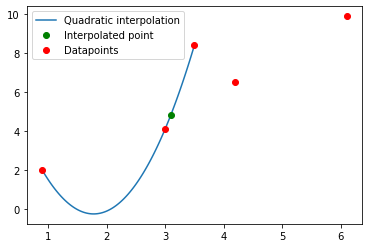

In [68]:
import numpy as np #imported to create a list of x-coordinates for plotting

point = 3.1

def automatic_quadratic(x,y,point, plot):
    ### Reuse your logic for finding the index here:
    ### Optionally you can try to implement the improved placement of the interpolation points
    
    index=0
    for i in range(len(x)):
        if x[i] < point and x[i+1] > point:
            index = i
            break
            
    if index != 0 and index != len(x):
        if abs(point-x[index+2]) < abs(point-x[index+1]):
            index += 1
        elif abs(point-x[index]) < abs(point-x[index+1]):
            index += -1
    
    
    x_data = [x[index], x[index+1], x[index+2]]
    y_data = [y[index], y[index+1], y[index+2]]
    c_0,c_1,c_2 = quadratic_interpolation(x_data,y_data)
    
    inter_val = c_0 + c_1 * (point-x_data[0])+c_2*(point-x_data[0])*(point-x_data[1])
    
    if plot == "y":
        xrange = np.linspace(x_data[0],x_data[2],100)
        yrange = c_0 + c_1* (xrange-x_data[0])+c_2*(xrange-x_data[0])*(xrange-x_data[1])
        plt.plot(xrange,yrange, label = "Quadratic interpolation")
    
    return inter_val

def quadratic_interpolation(x,y):
    '''This function should find the constants defined above from the 2 lists
    of 3 x and y-coordinates and return the constants'''
    ## Write your code here
    
    c_0 = y[0]
    c_1 = (y[1]-c_0)/(x[1]-x[0])
    c_2 = (y[2]-c_0-c_1*(x[2]-x[0]))/((x[2]-x[0])*(x[2]-x[1]))
    
    return c_0,c_1,c_2




inter_val = automatic_quadratic(dataset_x,dataset_y,point,"y")
print(round(inter_val,3))
plt.plot(point, inter_val, "go", label = "Interpolated point")
plt.plot(dataset_x, dataset_y, "ro", label ="Datapoints")
plt.legend()

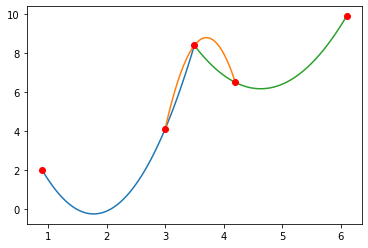

In [69]:

'''This illustrates the possible quadratic interpolations of the dataset.
You are not required to do list slicing yourself '''
for i in range(len(dataset_x)-2):
    x_data = dataset_x[i:len(dataset_x)-2+i]
    y_data = dataset_y[i:len(dataset_x)-2+i]
    
    c_0,c_1,c_2 = quadratic_interpolation(x_data,y_data)
    
    xrange = np.linspace(x_data[0],x_data[2],100)    #creates a range of evenly spaced x-vales for plotting
    yrange = c_0 + c_1* (xrange-x_data[0])+c_2*(xrange-x_data[0])*(xrange-x_data[1]) #creates y-values from the above
    
    plt.plot(xrange,yrange)  #plots each quadratic function

plt.plot(dataset_x,dataset_y,"ro")  #plots our original dataset with red dots

## d) Extra challenge (not mandatory)

We write our function in the same general form as above:

$$f(x) = c_0 + c_1 (x-x_0) + c_2 (x-x_0)(x-x_1)+c_3 (x-x_0)(x-x_1)(x-x_2)$$

Derive the equation for the constant $c_3$.

Now do the same as in c) for cubic interpolation, use the same dataset and try to adapt the code from c). 

The logic for choosing your points is changed only slightly from b)